# Resumo do curso

#### Realizar a importação do pandas

In [1]:
import pandas as pd

#### Realizar a leitura dos nossos dados

In [2]:
df = pd.read_csv('dados/aluguel.csv', sep= ';')

In [3]:
df.head(5) #Listar as 5 primeiras linhas

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


#### Verificar algumas informações do DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


#### Verificar os tipos de dados das colunas

In [5]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

#### Verificar quantos registros e colunas existem

In [6]:
df.shape #32960 Registros e 9 colunas

(32960, 9)

#### Obter os tipos de imóveis

In [7]:
tipos = df['Tipo'].drop_duplicates()  #Remove os dados duplicados 
tipos                                 #Array contendo os tipos de imóveis
# df['Tipo'].unique faz a mesma coisa

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

#### Trazer somente os imóveis residenciais

In [8]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila',
]

In [9]:
selecao = df['Tipo'].isin(residencial) #isin() funciona como o operador IN que retorna True or False
df[selecao]                            #Mostrará somente os dados onde os registros forem TRUE

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


**podemos usar ``isin()`` ou até mesmo ``(df['Tipo'] == 'Casa')`` pois esta parte também retornará um Boolean, portanto pode ser usado qualquer um deles**

#### Utilização do LOC e ILOC

In [10]:
#LOC - Utilizado para trazer linhas e colunas do formulário com base nos seus valores
df.loc[0]        #Retorna a 1 linha
df.loc[0,'Tipo'] #Retorna o 'Tipo' do 1 registro

'Quitinete'

In [11]:
#ILOC - Utilizado para trazer linhas e colunas formulário com base nos seus indexs
df.iloc[0]       #Retorna a 1 linha
df.iloc[0,1]     #Retorna o 'Tipo' do 1 registro

'Copacabana'

In [12]:
# Em ambos podemos trazer mais resultados
df.loc[0:4,['Tipo','Quartos']] #Podemos usar os Slicings para nos mover entre os valores

,Tipo,Quartos
0,Quitinete,1
1,Casa,2
2,Conjunto Comercial/Sala,0
3,Apartamento,1
4,Apartamento,1


## Tratamento dos dados Faltantes

In [13]:
# Para verificar os valores nulos podemos usar o isnull()
df.isnull() #onde o True equivalem aos valores nulos ou
df.notnull() #Onde o False equivalem aos valores nulos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
32955,True,True,True,True,True,True,True,True,True
32956,True,True,True,True,True,True,True,True,True
32957,True,True,True,True,True,True,True,True,True
32958,True,True,True,True,True,True,True,True,False


In [14]:
# Outra maneira de confirmar a quantidade de dados nulos é usando o info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [15]:
df[df['Valor'].isnull()] #Mostrara todos os registros da coluna Valor nulos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [16]:
# Para dropar os valores nulos podemos usar o dropna()
df.dropna(subset = ['Valor'], inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32943 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32943 non-null  object 
 1   Bairro      32943 non-null  object 
 2   Quartos     32943 non-null  int64  
 3   Vagas       32943 non-null  int64  
 4   Suites      32943 non-null  int64  
 5   Area        32943 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28854 non-null  float64
 8   IPTU        22716 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [18]:
#Queremos também apagar os apartamntos que não possuem condominios
#Primeiro precisamos filtrar estes valores
selecao = (df['Tipo'] == 'Apartamento') & (df['Condominio'].isnull()) 
#esse codigo acima trara TRUE somente se for apartamento e tiver taxa de condominio
df = df[~selecao] # O ~ é o sinal de inversão então fara o contrario e excluira todos apartamentos sem condominio

In [19]:
# Podemos também substituir os valores nullos por outros valores a nossa escolha, com o fillna()
# Então vamos substituir os valroes de IPTU e condominio por 0
df= df.fillna({'Condominio':0,'IPTU':0})
#Mesmo que df.fillna(0) porem este vai para todos os nulos do df

In [20]:
df.info() #Podemos ver que agora as informações estão batendo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


## Agrupando dados

Como a ideia e um pouco mais dificil de entender veja <a href='Curso Pandas/Criando Agrupamentos.ipynb'> o Notebook sobre isso </a>

In [21]:
df_residencial = pd.read_csv('Dados/alugel_residencial.csv',sep=';')

In [40]:
grupo_tipo = df_residencial.groupby('Tipo') 
#grupo_tipo.groups #Retorna um dicionario contendo os valores por agrupamento

In [23]:
for tipo, valor in grupo_tipo:
    print(f"{tipo} -> {df['Valor'].mean()}")

Apartamento -> 13177.971364681036
Casa -> 13177.971364681036
Casa de Condomínio -> 13177.971364681036
Casa de Vila -> 13177.971364681036
Quitinete -> 13177.971364681036


In [24]:
grupo_tipo[['Valor']].mean().round(2)

,Valor
Tipo,
Apartamento,4805.30
Casa,6793.45
Casa de Condomínio,11952.06
Casa de Vila,1574.37
Quitinete,1246.84


In [25]:
#Podemos também agrupar trazendo so uma coluna
grupo_tipo = df.groupby('Tipo')['Valor']
# grupo_tipo.groups

In [26]:
new_df_tipo = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    selecao = (df['Tipo'] == tipo)
    df_selecao = df[selecao]
    new_df_tipo = pd.concat([new_df_tipo, df_selecao])

In [27]:
new_df_tipo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
28257,Terreno Padrão,Botafogo,0,0,0,465,25000.0,0.0,2753.0
29433,Terreno Padrão,Barra da Tijuca,0,0,0,1110,140000.0,0.0,0.0
29629,Terreno Padrão,Curicica,0,0,0,1200,30000.0,0.0,500.0
30016,Terreno Padrão,Barra da Tijuca,1,0,0,529,35000.0,0.0,1222.0


## Identificando os Outliers

In [28]:
# Importar o Matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#Config do matplot para o tamanho do gráfico
plt.rc('figure', figsize = (14, 6))

<AxesSubplot:>

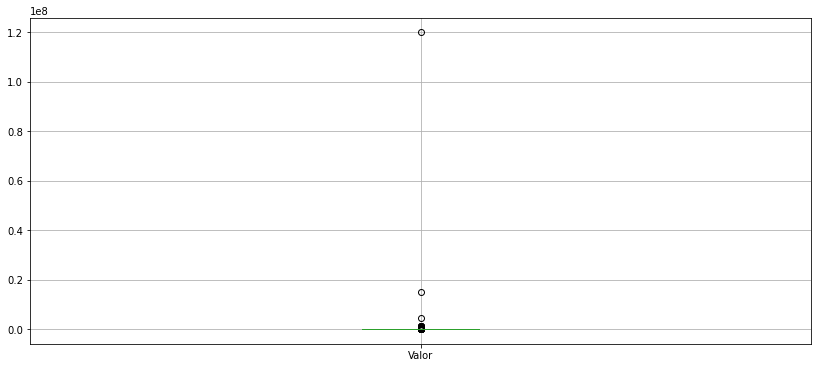

In [29]:
# Executar um BOXPLOT para identificar os OUTLIERS
df.boxplot(['Valor'])

In [30]:
# Com Base no BOXPLOT podemos ver os OUTLIERS

<img src='Curso Pandas/Box-Plot.png' width=50%>

In [31]:
# Com base no BOXPLOT podemos utilizar as formulas para encontrar os dados que estão OUTLIERS

In [32]:
#Como estamos vendo sobre o Valor
valor = df['Valor']

In [33]:
q1 = valor.quantile(.25) #Pegar o 1Q
q3 = valor.quantile(.75) #Pegar o 3Q
iiq = q3 - q1 #Intervalo entre os Quartis
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [34]:
# Precisamos filtrar esses valores no nosso df
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
new_df = df[selecao]

<AxesSubplot:>

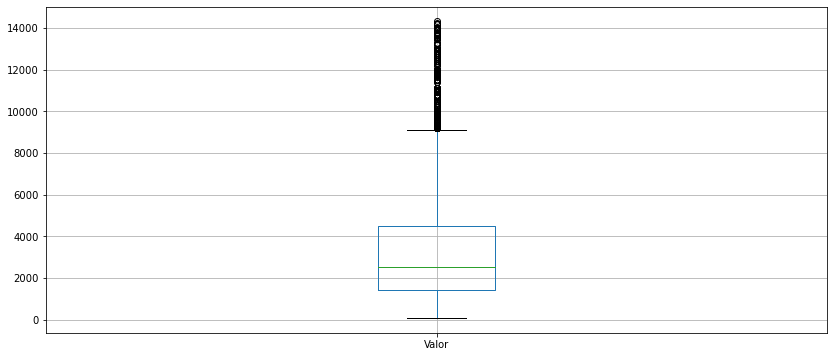

In [35]:
new_df.boxplot(['Valor'])

In [36]:
# Já removemos os OUTLIERS porem como a tabela foi atualizada tudo, é necessario verificar se estes OUTLIERS 
# estão corretos ou não

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

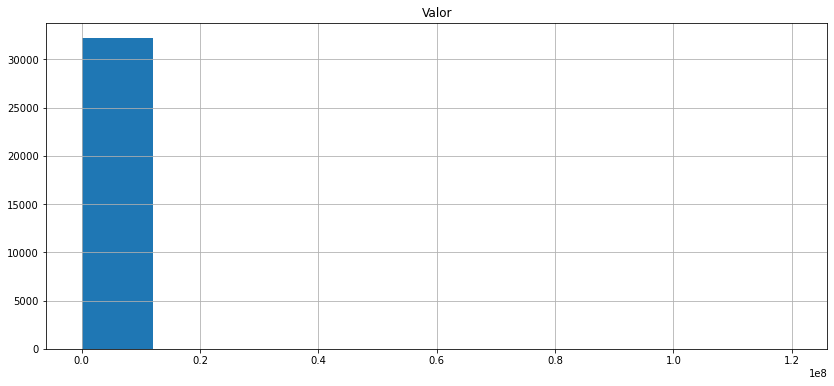

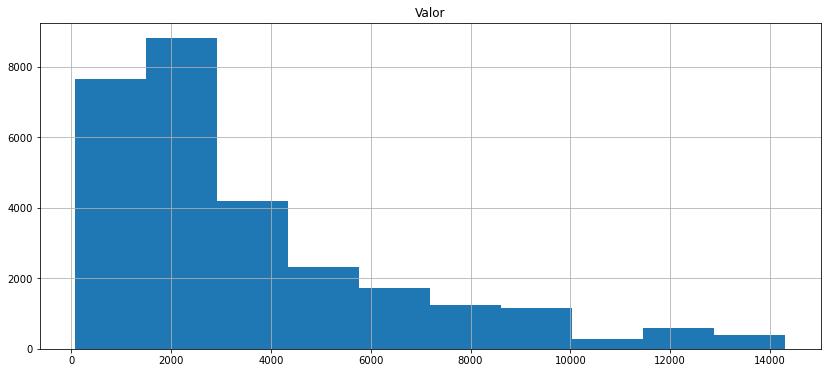

In [37]:
#Podemos ver a diferença dos histogramas dos DataFrames antes e depois da limpeza
df.hist(['Valor'])
new_df.hist(['Valor'])

In [38]:
tipos = ['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento']
selecao = df['Tipo'].isin(tipos)
df_filtrado = df[selecao]

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

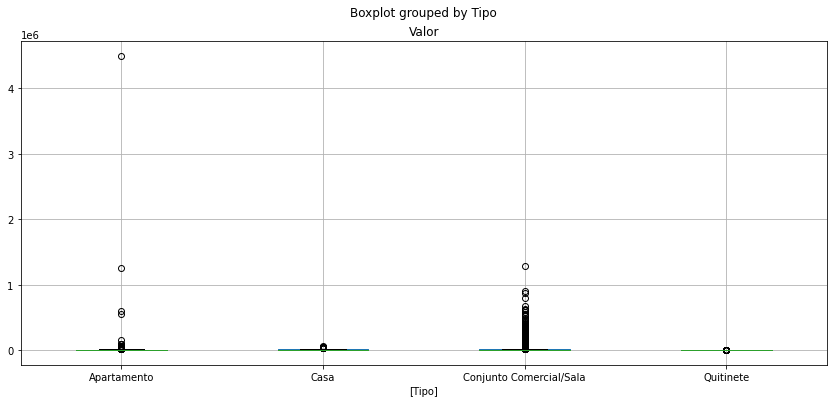

In [39]:
#Podemos também ver os OUTLIERS de cada tipo
df_filtrado.boxplot(['Valor'], by = ['Tipo'])